In [71]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
% config BackendInline.figure_format = 'retina'
plt.style.use('fivethirtyeight')
% matplotlib inline

In [4]:
df = pd.read_pickle('df.pkl')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [34]:
predictors = df.columns.tolist()
predictors.remove('left')

X = df[predictors]
y = df['left']

In [36]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [27]:
print('X', X.shape)
print('y', y.shape)

('X', (14999, 20))
('y', (14999,))


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
# Using Smote to upsample

oversampler=SMOTE(random_state=0)
Xos,yos=oversampler.fit_sample(X_train,y_train)

print('y - 1',len(yos[yos==1]))
print('y - 0',len(yos[yos==1]))

('y - 1', 9134)
('y - 0', 9134)


In [79]:
# Scaling

S_scaler = StandardScaler()
M_scaler = MinMaxScaler()

# Standard Scaling
Xs1 = S_scaler.fit_transform(Xos)
Xst1 = S_scaler.fit_transform(X_test)

# MinMax Scaling
Xs2 = M_scaler.fit_transform(Xos)
Xst2 = M_scaler.fit_transform(X_test)

In [80]:
# Logistic Regression

lor = LogisticRegression()

lor.fit(Xs2,yos)
preds = lor.predict(Xst2)
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, lor.predict(Xst2))))

print(classification_report(y_test,lor.predict(Xst2)))

Logistic regression accuracy: 0.766
             precision    recall  f1-score   support

          0       0.92      0.76      0.83      2294
          1       0.50      0.80      0.62       706

avg / total       0.82      0.77      0.78      3000



In [81]:
# K-nearest Neighbors

knn = KNeighborsClassifier()

knn.fit(Xs2,yos)
preds = knn.predict(Xst2)
print('KNN accuracy: {:.3f}'.format(accuracy_score(y_test, knn.predict(Xst2))))

print(classification_report(y_test,knn.predict(Xst2)))

KNN accuracy: 0.940
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      2294
          1       0.83      0.93      0.88       706

avg / total       0.94      0.94      0.94      3000



In [82]:
# Random Forest

rfc = RandomForestClassifier()

rfc.fit(Xs2,yos)

# View the predicted probabilities of the first 10 observations
rfc.predict_proba(Xst2)[0:10]
preds = rfc.predict(Xst2)
print('Random Forest regression accuracy: {:.3f}'.format(accuracy_score(y_test, rfc.predict(Xst2))))
list(zip(X_train, rfc.feature_importances_))

print(classification_report(y_test,rfc.predict(Xst2)))

Random Forest regression accuracy: 0.985
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      2294
          1       0.98      0.95      0.97       706

avg / total       0.99      0.99      0.99      3000



In [83]:
# Support Vector Classifier

svc = SVC()

svc.fit(Xs2,yos)

preds = svc.predict(Xst2)
print('Support Vector Machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(Xst2))))

print(classification_report(y_test,svc.predict(Xst2)))

Support Vector Machine accuracy: 0.853
             precision    recall  f1-score   support

          0       0.96      0.84      0.90      2294
          1       0.63      0.89      0.74       706

avg / total       0.88      0.85      0.86      3000



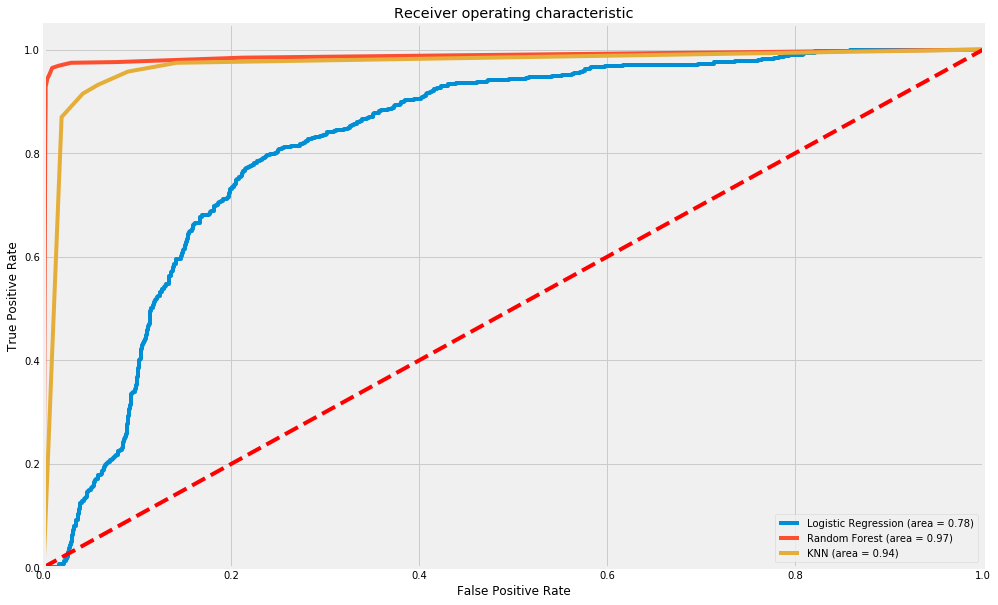

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lor_roc_auc = roc_auc_score(y_test, lor.predict(Xst2))
fpr, tpr, thresholds = roc_curve(y_test, lor.predict_proba(Xst2)[:,1])

rf_roc_auc = roc_auc_score(y_test, rfc.predict(Xst2))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rfc.predict_proba(Xst2)[:,1])

knn_roc_auc = roc_auc_score(y_test, knn.predict(Xst2))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(Xst2)[:,1])

plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lor_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()